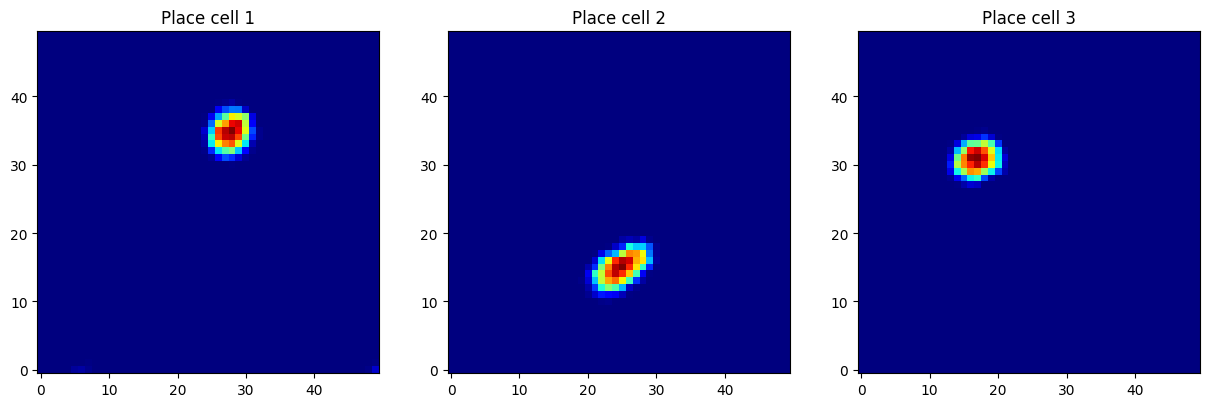

In [5]:
import matplotlib.pyplot as plt
import brainpy as bp
import brainpy.math as bm
from Model import Hierarchical_network
import numpy as np

# load the data
data = np.load('band_grid_place_heatmap.npz')
heatmaps_place = data['heatmaps_place']
# plot the data
# plot three cells, random shuffle 3 cells for 800
probe_index = np.random.choice(heatmaps_place.shape[0], 3, replace=False)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, probe_index in enumerate(probe_index):
    ax[i].imshow(heatmaps_place[probe_index].T, cmap='jet', interpolation='nearest', origin='lower')
    ax[i].set_title(f'Place cell {i+1}')

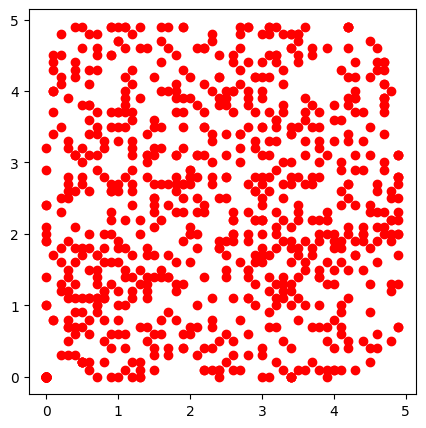

In [9]:
def compute_place_field_centers(heatmap):
    """
    输入:
        heatmap: numpy 数组，形状为 (N, 50, 50)，表示 N 个 place cell 的空间 tuning map
    输出:
        place_field_centers: numpy 数组，形状为 (N, 2)，每一行是 (x_center, y_center)
    """
    N, H, W = heatmap.shape
    # 将每个 heatmap 展平成二维，然后取最大值索引
    max_indices = np.argmax(heatmap.reshape(N, -1), axis=1)
    y_coords, x_coords = np.unravel_index(max_indices, (H, W))
    centers = np.stack([x_coords, y_coords], axis=1)  # shape: (N, 2)

    return centers*5/50

place_field_center = compute_place_field_centers(heatmaps_place)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(place_field_center[:,0], place_field_center[:,1], c='red', label='Place field centers')
# save place field centers
np.savez('place_field_centers.npz', place_field_centers=place_field_center)
